<a href="https://colab.research.google.com/github/Saivkumar/SaivKumar/blob/main/Penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN

In [2]:
from sklearn.preprocessing import StandardScaler

**Loading Dataset**

In [3]:
df=pd.read_csv('/content/Penguins Dataset.zip')

**Summarizing the Dataset**

In [4]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


This dataset describes the measurements of penguins, often used in biological and ecological studies to analyze species characteristics and differences. This data can be used for Species Identification,Health and Fitness,Behavioral Studies,Ecological Studies.

**Performing EDA**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


**Changing Datatype**

In [7]:
df['sex']=df['sex'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   culmen_length_mm   342 non-null    float64 
 1   culmen_depth_mm    342 non-null    float64 
 2   flipper_length_mm  342 non-null    float64 
 3   body_mass_g        342 non-null    float64 
 4   sex                335 non-null    category
dtypes: category(1), float64(4)
memory usage: 11.3 KB


**Checking Duplicates and Null Values and Dropping**

In [10]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [12]:
df[df.duplicated()].shape

(1, 5)

In [13]:
df[df.duplicated()]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
339,NaN,NaN,NaN,NaN,NaN


In [14]:
df1=df.drop_duplicates()

In [15]:
df1.shape

(343, 5)

In [16]:
df1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,FEMALE
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


**Checking NUll Values**

In [21]:
rows_with_nan = df1[df1.isna().any(axis=1)]

In [23]:
rows_with_nan

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,NaN,NaN,NaN,NaN,NaN
8,34.1,18.1,193.0,3475.0,NaN
10,37.8,17.1,186.0,3300.0,NaN
11,37.8,17.3,180.0,3700.0,NaN
47,37.5,18.9,179.0,2975.0,NaN
246,44.5,14.3,216.0,4100.0,NaN
286,46.2,14.4,214.0,4650.0,NaN
324,47.3,13.8,216.0,4725.0,NaN


**Dropping Null Values of entire Row**

In [42]:
df3 = df1.dropna(how='all')

In [43]:
df3.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  7
dtype: int64

**Mode Imputation for Missing values of Categorical Column Sex**

In [46]:
mode=df3['sex'].mode()[0]

In [47]:
mode

'MALE'

In [48]:
df3['sex'].fillna(mode,inplace=True)

<ipython-input-48-c95b6358d3cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['sex'].fillna(mode,inplace=True)


In [49]:
df3.isna().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [54]:
value_counts = df3['sex'].value_counts()

In [55]:
value_counts

sex
MALE      176
FEMALE    165
.           1
Name: count, dtype: int64

In [61]:
data = df3[df3['sex'] != '.']

In [69]:
value_counts1 = data['sex'].value_counts()

In [70]:
value_counts1

sex
MALE      176
FEMALE    165
.           0
Name: count, dtype: int64

**Using One Hot Encoding to change object values to integers of Sex column**

In [71]:
data1=pd.get_dummies(data,columns=['sex'],dtype=int)

In [72]:
data1

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,0,1
1,39.5,17.4,186.0,3800.0,0,1,0
2,40.3,18.0,195.0,3250.0,0,1,0
4,36.7,19.3,193.0,3450.0,0,1,0
5,39.3,20.6,190.0,3650.0,0,0,1
...,...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,0,1,0
340,46.8,14.3,215.0,4850.0,0,1,0
341,50.4,15.7,222.0,5750.0,0,0,1
342,45.2,14.8,212.0,5200.0,0,1,0


**Dropping Unnecessary Column**

In [73]:
data2=data1.drop('sex_.',axis=1)

In [74]:
data2

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,0,1
1,39.5,17.4,186.0,3800.0,1,0
2,40.3,18.0,195.0,3250.0,1,0
4,36.7,19.3,193.0,3450.0,1,0
5,39.3,20.6,190.0,3650.0,0,1
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,1,0
340,46.8,14.3,215.0,4850.0,1,0
341,50.4,15.7,222.0,5750.0,0,1
342,45.2,14.8,212.0,5200.0,1,0


**Converting the Dataset in DataFrame Format to** **Array**

In [75]:
df_array = data2.values

In [76]:
df_array

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00, 1.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00, 0.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00, 0.00e+00],
       ...,
       [5.04e+01, 1.57e+01, 2.22e+02, 5.75e+03, 0.00e+00, 1.00e+00],
       [4.52e+01, 1.48e+01, 2.12e+02, 5.20e+03, 1.00e+00, 0.00e+00],
       [4.99e+01, 1.61e+01, 2.13e+02, 5.40e+03, 0.00e+00, 1.00e+00]])

**Applying Standardization to the Dataset**

In [77]:
scale = StandardScaler()

In [78]:
x = scale.fit_transform(df_array)

In [79]:
x

array([[-0.88290872,  0.78276694, -0.12667377, -0.561437  , -0.96824584,
         0.96824584],
       [-0.80964185,  0.12394677, -0.10748419, -0.4990246 ,  1.03279556,
        -1.03279556],
       [-0.66310812,  0.42801762, -0.07294293, -1.18556092,  1.03279556,
        -1.03279556],
       ...,
       [ 1.18688028, -0.73758731,  0.03068083,  1.93505872, -0.96824584,
         0.96824584],
       [ 0.234411  , -1.19369358, -0.00769834,  1.2485224 ,  1.03279556,
        -1.03279556],
       [ 1.09529669, -0.53487341, -0.00386043,  1.49817197, -0.96824584,
         0.96824584]])

**Loading the Model**

In [80]:
data2.columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')

In [206]:
model = DBSCAN(min_samples=23)

In [207]:
model

DBSCAN(min_samples=23)

**Training the Model**

In [208]:
model.fit(x)

DBSCAN(min_samples=23)

**Displaying the Labels**

In [209]:
model.labels_

array([-1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1,  1,  0, -1, -1,  1,  0,  1,
       -1, -1, -1, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1,  1, -1,  1, -1,
        1, -1, -1,  0,  1,  0, -1, -1, -1, -1,  1,  0, -1,  0, -1,  0, -1,
       -1, -1,  0,  1, -1, -1,  0, -1, -1, -1,  0, -1, -1, -1, -1,  1, -1,
       -1,  1, -1, -1,  1,  0, -1, -1,  1,  0, -1,  0, -1,  0, -1, -1, -1,
       -1, -1, -1,  1, -1,  1, -1, -1, -1,  1, -1, -1,  0, -1, -1, -1, -1,
        1, -1,  1,  0, -1,  0,  1,  0, -1, -1,  1, -1,  1, -1,  1,  0,  1,
       -1, -1,  0,  1, -1, -1, -1, -1, -1,  0,  1,  1, -1, -1,  0, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  2,  2

In [210]:
set(list(model.labels_))

{-1, 0, 1, 2}

In [211]:
class_ = pd.DataFrame(model.labels_,columns=['cluster_values'])

In [212]:
class_

,cluster_values
0,-1
1,-1
2,-1
3,-1
4,-1
...,...
336,2
337,2
338,-1
339,2


**Merging the cluster_values to the Entire Dataset**

In [213]:
final_df = pd.concat([data2,class_],axis=1)

In [214]:
final_df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster_values
0,39.1,18.7,181.0,3750.0,0.0,1.0,-1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,-1.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,-1.0
4,36.7,19.3,193.0,3450.0,1.0,0.0,-1.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...
342,45.2,14.8,212.0,5200.0,1.0,0.0,NaN
343,49.9,16.1,213.0,5400.0,0.0,1.0,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,-1.0
336,NaN,NaN,NaN,NaN,NaN,NaN,2.0


**Generating Inference**

In [215]:
final_df['cluster_values'].unique()

array([-1.,  1.,  0.,  2., nan])

In [216]:
final_df[final_df['cluster_values']==-1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster_values
0,39.1,18.7,181.0,3750.0,0.0,1.0,-1.0
1,39.5,17.4,186.0,3800.0,1.0,0.0,-1.0
2,40.3,18.0,195.0,3250.0,1.0,0.0,-1.0
4,36.7,19.3,193.0,3450.0,1.0,0.0,-1.0
6,38.9,17.8,181.0,3625.0,1.0,0.0,-1.0
...,...,...,...,...,...,...,...
334,46.2,14.1,217.0,4375.0,1.0,0.0,-1.0
335,55.1,16.0,230.0,5850.0,0.0,1.0,-1.0
338,47.2,13.7,214.0,4925.0,1.0,0.0,-1.0
340,46.8,14.3,215.0,4850.0,1.0,0.0,-1.0


In [217]:
final_df[final_df['cluster_values']==1]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster_values
5,39.3,20.6,190.0,3650.0,0.0,1.0,1.0
14,34.6,21.1,-132.0,4400.0,0.0,1.0,1.0
19,46.0,21.5,194.0,4200.0,0.0,1.0,1.0
27,40.5,17.9,187.0,3200.0,1.0,0.0,1.0
31,37.2,18.1,178.0,3900.0,0.0,1.0,1.0
33,40.9,18.9,184.0,3900.0,0.0,1.0,1.0
39,39.8,19.1,184.0,4650.0,0.0,1.0,1.0
47,37.5,18.9,179.0,2975.0,0.0,1.0,1.0
49,42.3,21.2,191.0,4150.0,0.0,1.0,1.0
51,40.1,18.9,188.0,4300.0,0.0,1.0,1.0


In [186]:
final_df[final_df['cluster_values']==0]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster_values
2,40.3,18.0,195.0,3250.0,1.0,0.0,0.0
5,39.3,20.6,190.0,3650.0,0.0,1.0,0.0
11,37.8,17.3,180.0,3700.0,0.0,1.0,0.0
14,34.6,21.1,-132.0,4400.0,0.0,1.0,0.0
15,36.6,17.8,185.0,3700.0,1.0,0.0,0.0
17,42.5,20.7,197.0,4500.0,0.0,1.0,0.0
19,46.0,21.5,194.0,4200.0,0.0,1.0,0.0
26,40.6,18.6,183.0,3550.0,0.0,1.0,0.0
27,40.5,17.9,187.0,3200.0,1.0,0.0,0.0
29,40.5,18.9,180.0,3950.0,0.0,1.0,0.0


In [218]:
final_df[final_df['cluster_values']==2]

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE,cluster_values
224,47.6,14.5,215.0,5400.0,0.0,1.0,2.0
225,46.5,13.5,210.0,4550.0,1.0,0.0,2.0
231,49.0,16.1,216.0,5550.0,0.0,1.0,2.0
237,49.2,15.2,221.0,6300.0,0.0,1.0,2.0
240,50.2,14.3,218.0,5700.0,0.0,1.0,2.0
241,45.1,14.5,215.0,5000.0,1.0,0.0,2.0
247,47.8,15.0,215.0,5650.0,0.0,1.0,2.0
251,42.8,14.2,209.0,4700.0,1.0,0.0,2.0
264,50.5,15.9,222.0,5550.0,0.0,1.0,2.0
269,45.2,15.8,215.0,5300.0,0.0,1.0,2.0


Visualizing the Result

In [219]:
input_x = final_df.iloc[:,:-1].values

In [220]:
input_x

array([[3.91e+01, 1.87e+01, 1.81e+02, 3.75e+03, 0.00e+00, 1.00e+00],
       [3.95e+01, 1.74e+01, 1.86e+02, 3.80e+03, 1.00e+00, 0.00e+00],
       [4.03e+01, 1.80e+01, 1.95e+02, 3.25e+03, 1.00e+00, 0.00e+00],
       ...,
       [     nan,      nan,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan],
       [     nan,      nan,      nan,      nan,      nan,      nan]])

In [221]:
output_y = final_df.iloc[:,-1].values

In [222]:
output_y

array([-1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1., -1.,
        1., -1., -1., -1., -1.,  1., -1., -1., -1., -1., -1., -1., -1.,
        1.,  0., -1., -1.,  1.,  0.,  1., -1., -1., -1., -1., -1.,  1.,
        0., -1., -1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,
       -1.,  0.,  1.,  0., -1., -1., -1., -1.,  1.,  0., -1.,  0., -1.,
        0., -1., -1., -1.,  0.,  1., -1., -1.,  0., -1., -1., -1.,  0.,
       -1., -1., -1., -1.,  1., -1., -1.,  1., -1., -1.,  1.,  0., -1.,
       -1.,  1.,  0., -1.,  0., -1.,  0., -1., -1., -1., -1., -1., -1.,
        1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  0., -1., -1., -1.,
       -1.,  1., -1.,  1.,  0., -1.,  0.,  1.,  0., -1., -1.,  1., -1.,
        1., -1.,  1.,  0.,  1., -1., -1.,  0.,  1., -1., -1., -1., -1.,
       -1.,  0.,  1.,  1., -1., -1.,  0., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1.,
       -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1., -1

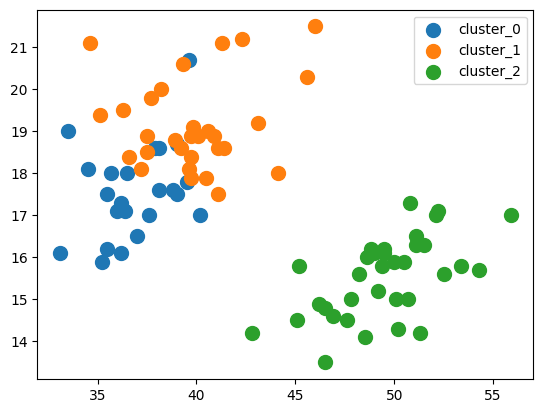

In [224]:
plt.scatter(input_x[output_y==0,0],input_x[output_y==0,1],s=100, label='cluster_0')
plt.scatter(input_x[output_y==1,0],input_x[output_y==1,1],s=100, label='cluster_1')
plt.scatter(input_x[output_y==2,0],input_x[output_y==2,1],s=100, label='cluster_2')
plt.legend()
plt.show()